In [ ]:
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import random 



In [ ]:
from keras.models import *

In [ ]:
Train_path = "drive/MyDrive/Data/train"

In [ ]:
Test_path = "drive/MyDrive/Data/test"

In [ ]:
import numpy as np
import keras 
import tensorflow as tf
from keras.preprocessing import image
from keras.layers import *

In [ ]:
#CNN model
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu',input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu' ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


In [ ]:
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 54, 54, 64)       

In [ ]:
#train it from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(
    rescale = 1./255
) 



In [ ]:
train_generator =  train_datagen.flow_from_directory(
    'drive/MyDrive/Data/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 253 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'no': 0, 'yes': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'drive/MyDrive/Data/test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 253 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs =10,
    validation_data = validation_generator,
    validation_steps = 2
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 [==============================] - 102s 13s/step - loss: 0.6869 - accuracy: 0.5929 - val_loss: 0.6392 - val_accuracy: 0.6562
Epoch 2/10
8/8 [==============================] - 78s 10s/step - loss: 0.6262 - accuracy: 0.6838 - val_loss: 0.5557 - val_accuracy: 0.7656
Epoch 3/10
8/8 [==============================] - 74s 9s/step - loss: 0.5917 - accuracy: 0.7194 - val_loss: 0.5901 - val_accuracy: 0.7031
Epoch 4/10
8/8 [==============================] - 70s 9s/step - loss: 0.5642 - accuracy: 0.7115 - val_loss: 0.5034 - val_accuracy: 0.8906
Epoch 5/10
8/8 [==============================] - 70s 9s/step - loss: 0.5513 - accuracy: 0.7589 - val_loss: 0.4601 - val_accuracy: 0.8125
Epoch 6/10
8/8 [==============================] - 68s 9s/step - loss: 0.4988 - accuracy: 0.7470 - val_loss: 0.4240 - val_accuracy: 0.8906
Epoch 7/10
8/8 [==============================] - 68s 8s/step - loss: 0.5124 - accuracy: 0.7431 - val_loss: 0.4886 - val_accuracy: 0.8438
Epoch 8/10
8/8 [===============

In [ ]:
model.save('model_adv.h5')

Testing and graph show


In [ ]:
model.evaluate_generator(train_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.4068157970905304, 0.8616600632667542]

In [ ]:
model.evaluate(validation_generator)

8/8 [==============================] - 16s 2s/step - loss: 0.3619 - accuracy: 0.8775


[0.36189910769462585, 0.8774703741073608]

In [ ]:
model = load_model('model_adv.h5')

In [ ]:
train_generator.class_indices

{'no': 0, 'yes': 1}

In [ ]:
y_actual = []
y_test = []



In [ ]:
import PIL

In [ ]:
for i in os.listdir("drive/MyDrive/Data/test/no"):
  img = image.load_img("drive/MyDrive/Data/test/no/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  ##############
  p = model.predict_on_batch(img)
  y_test.append(p[0,0])
  y_actual.append(1)


In [ ]:
for i in os.listdir("drive/MyDrive/Data/test/yes"):
  img = image.load_img("drive/MyDrive/Data/test/yes/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  ##############
  p = model.predict_on_batch(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [ ]:
y_actual = np.array(y_actual).astype(int)
y_test = np.array(y_test).astype(int)

In [ ]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_actual) 


In [ ]:
import seaborn as sns

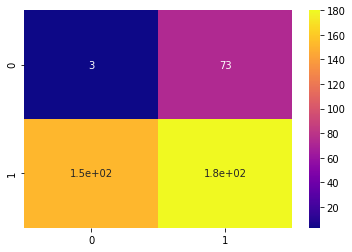

In [ ]:
sns.heatmap(cm,cmap='plasma',annot=True)